In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['student-alcohol-consumption', 'train-school']


In [2]:
data_math = pandas.read_csv("../input/student-alcohol-consumption/student-mat.csv")
data_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


Math파일 데이터

In [3]:
data_portuguese = pandas.read_csv("../input/student-alcohol-consumption/student-por.csv")
data_portuguese

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


por파일 데이터

In [4]:
data_math['class'] = 'math'
data_portuguese['class'] = 'portuguese'
data = data_math.append(data_portuguese)

class명을 math,portuguese를 추가하고,math파일이랑 por파일 합치기

In [5]:
data.T.iloc[:,1:8]

,1,2,3,4,5,6,7
school,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,M,M,F
age,17,15,15,16,16,16,17
address,U,U,U,U,U,U,U
famsize,GT3,LE3,GT3,GT3,LE3,LE3,GT3
Pstatus,T,T,T,T,T,T,A
Medu,1,1,4,3,4,2,4
Fedu,1,1,2,3,3,2,4
Mjob,at_home,at_home,health,other,services,other,other
Fjob,other,other,services,other,other,other,teacher


In [6]:
data['class'].value_counts()

portuguese    649
math          395
Name: class, dtype: int64

portuguese, math 수업 듣는 학생 수

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


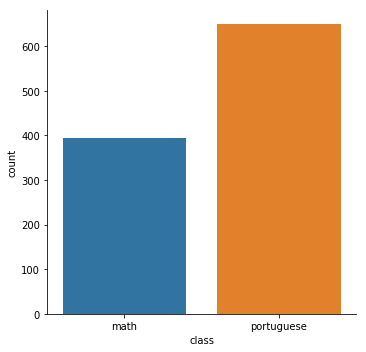

In [7]:

seaborn.factorplot('class',kind='count',data=data)

수학수업과 포루트갈언어 수업 듣는 학생 중 포루트갈언어 수업 듣는 학생이 많다.


In [8]:
data['sex'].value_counts()

F    591
M    453
Name: sex, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


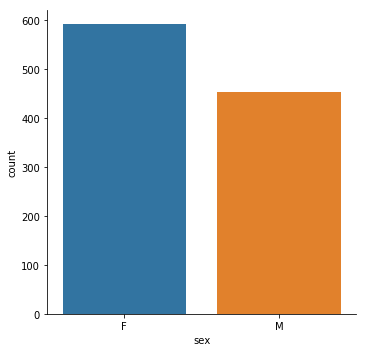

In [9]:

seaborn.factorplot('sex',kind='count',data=data)

여학생보다 남학생이 많다.

In [10]:
data['school'].value_counts()

GP    772
MS    272
Name: school, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


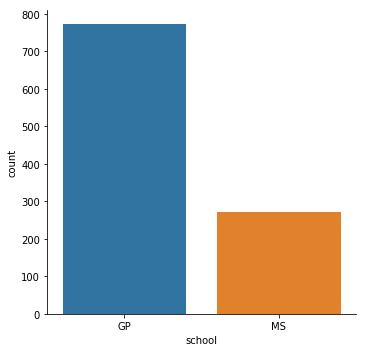

In [11]:

seaborn.factorplot('school',kind='count',data=data)

In [12]:
data['age'].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

16살,17살,18살,15살이 많음

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


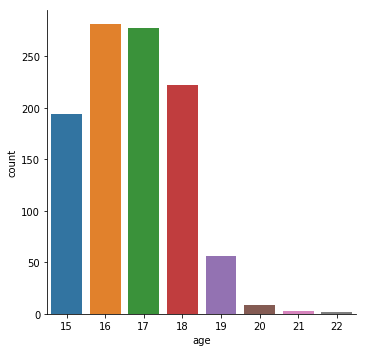

In [13]:
seaborn.factorplot('age',kind='count',data=data)

In [14]:
columns = data.columns
numeric = []
character = []
for i in columns:
	if data[i].dtype == "int64":
		numeric.append(i)
	else:
		character.append(i)
numeric

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Separates numeric and character types to obtain correlations. 
And character types change to numeric.

In [15]:
dummy_data = pandas.get_dummies(data[character])
dummy_data

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,class_math,class_portuguese
0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
2,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0
3,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0
4,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0
5,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0
6,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0
7,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0
8,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0
9,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0


character type 데이터에 대해 dummy데이터 만들기

In [16]:
concat_data = pandas.concat([data[numeric],dummy_data],axis=1)
concat_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,class_math,class_portuguese
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0
6,16,2,2,1,2,0,4,4,4,1,1,3,0,12,12,11,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,5,6,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,1,1,0,16,18,19,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0
9,15,3,4,1,2,0,5,5,1,1,1,5,0,14,15,15,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0


numeric data와 character data 합치기

In [17]:
correlations = concat_data.corr()
correlations

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,class_math,class_portuguese
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282,-0.169938,0.169938,0.038832,-0.038832,0.071257,-0.071257,-0.013290,0.013290,-0.006887,0.006887,0.089702,-0.093470,0.037066,-0.024883,-0.052402,0.065349,-0.106505,0.038894,0.001709,-0.061390,0.018524,-0.002368,0.006563,-0.023719,-0.126978,-0.081701,0.357601,0.202824,-0.202824,0.116904,-0.116904,0.027917,-0.027917,0.073648,-0.073648,0.046846,-0.046846,0.244601,-0.244601,0.033229,-0.033229,-0.173800,0.173800,-0.018790,0.018790
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472,0.235114,-0.235114,-0.109387,0.109387,-0.179720,0.179720,0.025556,-0.025556,0.077133,-0.077133,-0.387814,0.258135,-0.231026,0.104984,0.452952,-0.091603,0.128323,-0.115679,-0.019372,0.260111,-0.116806,0.024313,-0.022861,0.126800,-0.043620,0.097703,-0.103730,0.023618,-0.023618,-0.143063,0.143063,-0.161349,0.161349,-0.116924,0.116924,-0.149287,0.149287,-0.206551,0.206551,-0.249728,0.249728,0.008685,-0.008685,0.101246,-0.101246
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796,0.187611,-0.187611,-0.070786,0.070786,-0.124303,0.124303,0.047290,-0.047290,0.049156,-0.049156,-0.188731,0.133393,-0.200426,0.079390,0.307594,-0.084975,0.202267,-0.230861,0.024698,0.348978,-0.059851,0.011945,-0.025451,0.075322,0.094286,-0.046298,-0.072834,-0.032450,0.032450,-0.153342,0.153342,-0.118897,0.118897,-0.093800,0.093800,-0.104681,0.104681,-0.191956,0.191956,-0.170012,0.170012,0.039906,-0.039906,0.094795,-0.094795
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627,-0.258834,0.258834,-0.042508,0.042508,0.343803,-0.343803,-0.031550,0.031550,-0.033883,0.033883,0.170171,-0.106540,0.038616,-0.068560,-0.083252,-0.052228,-0.090635,0.099122,-0.031258,-0.021649,0.128033,-0.112132,0.040928,-0.063705,0.024526,-0.061961,0.070983,0.033940,-0.033940,0.026117,-0.026117,0.083679,-0.083679,0.025834,-0.025834,0.018641,-0.018641,0.081857,-0.081857,0.169485,-0.169485,-0.013603,0.013603,-0.079881,0.079881
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629,0.133255,-0.133255,0.239972,-0.239972,-0.037480,0.037480,0.035109,-0.035109,-0.005049,0.005049,-0.018424,-0.015221,-0.007451,0.019401,0.020386,0.004087,0.107722,-0.038541,0.011951,-0.033607,-0.084553,-0.019542,-0.097277,0.187202,0.011457,-0.020958,0.018770,-0.070598,0.070598,-0.143858,0.143858,-0.105704,0.105704,-0.078847,0.078847,-0.056817,0.056817,-0.186556,0.186556,-0.049695,0.049695,-0.038435,0.038435,0.060934,-0.060934
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145,-0.066856,0.066856,-0.065543,0.065543,0.061160,-0.061160,0.044589,-0.044589,0.004615,-0.004615,0.070264,-0.025398,-0.001451,0.058457,-0.134332,0.028483,-0.036386,0.007676,0.031904,-0.073646,0.098883,-0.021017,-0.007442,-0.087729,-0.059589,-0.090476,0.261738,-0.00248

Feature들간의 얼마나 상관관계가 있는지 구하기

In [18]:
def get_redundant_pairs(data):
	pairs_to_drop = set()
	cols = data.columns
	for i in range(0, concat_data.shape[1]):
		for j in range(0, i+1):
			pairs_to_drop.add((cols[i],cols[j]))
	return pairs_to_drop

def get_top_abs_correlations(data, n=30):
	abs_corr = data.corr().abs().unstack()
	labels_to_drop = get_redundant_pairs(data)
	abs_corr = abs_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
	return abs_corr[14:n]


correlations 높은 순서로 정렬하기 위해 작성한 함수.

In [19]:
get_top_abs_correlations(concat_data,30)

G2               G3                   0.910743
G1               G2                   0.858739
guardian_father  guardian_mother      0.836005
G1               G3                   0.809142
Fjob_other       Fjob_services        0.702118
Medu             Fedu                 0.642063
Dalc             Walc                 0.627814
reason_course    reason_home          0.479456
paid_no          class_math           0.473453
                 class_portuguese     0.473453
paid_yes         class_math           0.473453
                 class_portuguese     0.473453
reason_course    reason_reputation    0.467110
Medu             Mjob_teacher         0.452952
Mjob_other       Mjob_services        0.428556
guardian_mother  guardian_other       0.416173
dtype: float64

correlations 높은 순서로 정렬하기.

In [20]:
pandas.DataFrame({"Walc":correlations['Walc'], 'Dalc':correlations['Dalc']}).T

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,class_math,class_portuguese
Walc,0.098291,-0.029331,0.019524,0.084292,-0.229073,0.107432,-0.100663,0.130377,0.399794,0.627814,1.000000,0.106669,0.139703,-0.142401,-0.128114,-0.115740,-0.026539,0.026539,-0.302623,0.302623,0.043391,-0.043391,-0.090019,0.090019,-0.047575,0.047575,-0.000364,0.024039,-0.046819,0.028414,0.01359,-0.080891,-0.037100,0.007303,0.097907,-0.08793,-0.014133,0.013145,0.071685,-0.048277,0.013889,-0.001791,-0.019788,0.093517,-0.093517,0.073596,-0.073596,-0.042812,0.042812,-0.006275,0.006275,0.084874,-0.084874,0.087271,-0.087271,-0.043615,0.043615,0.016426,-0.016426,0.004043,-0.004043
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642,-0.066006,0.066006,-0.275928,0.275928,0.064030,-0.064030,-0.075646,0.075646,-0.015777,0.015777,-0.015903,-0.076301,-0.004774,0.044716,0.03103,-0.029547,-0.017665,-0.060645,0.097602,-0.01360,-0.033164,0.045040,0.133297,-0.102682,0.034565,-0.077368,0.082103,0.025852,-0.025852,0.022275,-0.022275,-0.041919,0.041919,0.010584,-0.010584,0.080647,-0.080647,0.112964,-0.112964,-0.039511,0.039511,-0.045311,0.045311,-0.011335,0.011335


workday alcohol, weekend alcohol 을 가지고 다른 feature들과 얼마나 상관관계가 있는지 확인해보기. 

In [21]:
walc = correlations['Walc']
dalc = correlations['Dalc']

In [22]:
threshold_walc = walc[abs(walc) > 0.15]
threshold_dalc = dalc[abs(dalc) > 0.15]

특정 Feature가 높을수록 술을 적게 먹는  Feature도 찾기위해 절대값을 해줌.

In [23]:
threshold_walc


studytime   -0.229073
goout        0.399794
Dalc         0.627814
Walc         1.000000
sex_F       -0.302623
sex_M        0.302623
Name: Walc, dtype: float64

In [24]:
threshold_dalc

studytime   -0.159665
goout        0.253135
Dalc         1.000000
Walc         0.627814
G1          -0.150943
sex_F       -0.275928
sex_M        0.275928
Name: Dalc, dtype: float64

In [25]:
walc_index = threshold_walc.index.tolist()
dalc_index = threshold_dalc.index.tolist()

In [26]:
walc_index

['studytime', 'goout', 'Dalc', 'Walc', 'sex_F', 'sex_M']

In [27]:
dalc_index

['studytime', 'goout', 'Dalc', 'Walc', 'G1', 'sex_F', 'sex_M']

In [28]:
walc_data = concat_data[walc_index]
dalc_data = concat_data[dalc_index]

In [29]:
walc_data

,studytime,goout,Dalc,Walc,sex_F,sex_M
0,2,4,1,1,1,0
1,2,3,1,1,1,0
2,2,2,2,3,1,0
3,3,2,1,1,1,0
4,2,2,1,2,1,0
5,2,2,1,2,0,1
6,2,4,1,1,0,1
7,2,4,1,1,1,0
8,2,2,1,1,0,1
9,2,1,1,1,0,1


In [30]:
dalc_data

,studytime,goout,Dalc,Walc,G1,sex_F,sex_M
0,2,4,1,1,5,1,0
1,2,3,1,1,5,1,0
2,2,2,2,3,7,1,0
3,3,2,1,1,15,1,0
4,2,2,1,2,6,1,0
5,2,2,1,2,15,0,1
6,2,4,1,1,12,0,1
7,2,4,1,1,6,1,0
8,2,2,1,1,16,0,1
9,2,1,1,1,14,0,1


In [31]:
walc_correlations = walc_data.corr()
dalc_correlations = dalc_data.corr()

In [32]:
walc_correlations

,studytime,goout,Dalc,Walc,sex_F,sex_M
studytime,1.000000,-0.072941,-0.159665,-0.229073,0.239972,-0.239972
goout,-0.072941,1.000000,0.253135,0.399794,-0.062530,0.062530
Dalc,-0.159665,0.253135,1.000000,0.627814,-0.275928,0.275928
Walc,-0.229073,0.399794,0.627814,1.000000,-0.302623,0.302623
sex_F,0.239972,-0.062530,-0.275928,-0.302623,1.000000,-1.000000
sex_M,-0.239972,0.062530,0.275928,0.302623,-1.000000,1.000000


In [33]:
dalc_correlations

,studytime,goout,Dalc,Walc,G1,sex_F,sex_M
studytime,1.000000,-0.072941,-0.159665,-0.229073,0.211314,0.239972,-0.239972
goout,-0.072941,1.000000,0.253135,0.399794,-0.101163,-0.062530,0.062530
Dalc,-0.159665,0.253135,1.000000,0.627814,-0.150943,-0.275928,0.275928
Walc,-0.229073,0.399794,0.627814,1.000000,-0.142401,-0.302623,0.302623
G1,0.211314,-0.101163,-0.150943,-0.142401,1.000000,0.025122,-0.025122
sex_F,0.239972,-0.062530,-0.275928,-0.302623,0.025122,1.000000,-1.000000
sex_M,-0.239972,0.062530,0.275928,0.302623,-0.025122,-1.000000,1.000000


In [34]:
concat_data['Alcohol'] = concat_data['Walc'] + concat_data['Dalc']

1. 남학생이 여학생보다 알콜 섭취가 높기 때문에, 나중에 알콜 중독 현상이 일어날 확률이 높음
2. 친구와 밖에 나가는 빈도가 높을수록 알콜에 노출될 확률이 높으므로, 더 많은 섭취 현상을 보임
3. 주말 섭취와 주중 섭취의 상관관계가 가장 높음.
4. 성적과 술의 섭취는 음의 상관관계 즉 반비례를 보임.

In [35]:
concat_data['Alcohol']

0       2
1       2
2       5
3       2
4       3
5       3
6       2
7       2
8       2
9       2
10      3
11      2
12      4
13      3
14      2
15      3
16      3
17      2
18      6
19      4
20      2
21      2
22      4
23      6
24      2
25      4
26      3
27      6
28      2
29     10
       ..
619     4
620     2
621     3
622     6
623     4
624     3
625     3
626     6
627     5
628     2
629     4
630     2
631     3
632     2
633     7
634     3
635     5
636     5
637     4
638     2
639     4
640     7
641     4
642     2
643     4
644     3
645     2
646     2
647     7
648     7
Name: Alcohol, Length: 1044, dtype: int64

In [36]:
concat_data['Alcohol'].value_counts()

2     391
3     182
4     159
5     118
6      85
7      49
8      26
10     24
9      10
Name: Alcohol, dtype: int64

In [37]:
machine_pre_data = concat_data.copy()
machine_pre_data = shuffle(machine_pre_data)
machine_pre_data = machine_pre_data.reset_index()
del machine_pre_data['index']

In [38]:
machine_pre_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,class_math,class_portuguese,Alcohol
0,16,2,1,1,2,0,4,3,5,1,1,5,2,8,9,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,2
1,17,4,4,2,2,0,3,3,3,2,3,4,0,12,12,12,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,5
2,15,3,2,1,2,0,4,2,2,1,1,1,0,16,18,19,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,2
3,16,3,3,1,2,0,2,3,5,1,4,3,6,13,12,13,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,5
4,16,2,2,1,2,0,4,3,4,1,2,2,4,8,7,6,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,3
5,15,4,4,1,2,0,3,3,3,1,2,2,0,10,8,9,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,3
6,16,4,3,1,4,0,4,2,2,1,1,2,2,17,17,17,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,2
7,16,2,2,1,1,0,4,2,5,1,2,5,0,17,16,16,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,3
8,17,2,1,1,1,0,4,4,2,2,4,5,0,12,12,13,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,6
9,15,4,4,2,1,0,4,3,2,1,1,5,6,13,14,14,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,2


In [39]:
X_data = machine_pre_data.columns.difference(['Walc', 'Dalc','Alcohol'])

In [40]:
X_data

Index(['Fedu', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'G1', 'G2', 'G3', 'Medu', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Pstatus_A', 'Pstatus_T',
       'absences', 'activities_no', 'activities_yes', 'address_R', 'address_U',
       'age', 'class_math', 'class_portuguese', 'failures', 'famrel',
       'famsize_GT3', 'famsize_LE3', 'famsup_no', 'famsup_yes', 'freetime',
       'goout', 'guardian_father', 'guardian_mother', 'guardian_other',
       'health', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes',
       'nursery_no', 'nursery_yes', 'paid_no', 'paid_yes', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'romantic_no',
       'romantic_yes', 'school_GP', 'school_MS', 'schoolsup_no',
       'schoolsup_yes', 'sex_F', 'sex_M', 'studytime', 'traveltime'],
      dtype='object')

In [41]:
X1 = machine_pre_data[X_data]
Y1 = machine_pre_data['Alcohol']

알콜 섭취 수를 구하기 위해 Dalc와 Walc를 더해줌.

In [42]:
X1

,Fedu,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,G1,G2,G3,Medu,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Pstatus_A,Pstatus_T,absences,activities_no,activities_yes,address_R,address_U,age,class_math,class_portuguese,failures,famrel,famsize_GT3,famsize_LE3,famsup_no,famsup_yes,freetime,goout,guardian_father,guardian_mother,guardian_other,health,higher_no,higher_yes,internet_no,internet_yes,nursery_no,nursery_yes,paid_no,paid_yes,reason_course,reason_home,reason_other,reason_reputation,romantic_no,romantic_yes,school_GP,school_MS,schoolsup_no,schoolsup_yes,sex_F,sex_M,studytime,traveltime
0,1,0,0,1,0,0,8,9,10,2,0,0,1,0,0,0,1,2,1,0,0,1,16,1,0,0,4,1,0,0,1,3,5,0,1,0,5,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,1,0,2,1
1,4,0,0,1,0,0,12,12,12,4,0,0,0,0,1,1,0,0,1,0,1,0,17,0,1,0,3,0,1,0,1,3,3,0,1,0,4,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,2,2
2,2,0,0,1,0,0,16,18,19,3,0,0,0,1,0,1,0,0,1,0,0,1,15,1,0,0,4,0,1,0,1,2,2,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,2,1
3,3,0,0,0,1,0,13,12,13,3,0,0,1,0,0,1,0,6,1,0,0,1,16,0,1,0,2,0,1,0,1,3,5,0,1,0,3,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,2,1
4,2,0,0,1,0,0,8,7,6,2,1,0,0,0,0,0,1,4,1,0,0,1,16,1,0,0,4,0,1,0,1,3,4,0,1,0,2,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,2,1
5,4,0,1,0,0,0,10,8,9,4,0,0,0,0,1,0,1,0,1,0,0,1,15,1,0,0,3,1,0,0,1,3,3,0,1,0,2,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,2,1
6,3,0,0,0,1,0,17,17,17,4,0,1,0,0,0,0,1,2,0,1,0,1,16,0,1,0,4,1,0,1,0,2,2,0,1,0,2,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,4,1
7,2,0,0,1,0,0,17,16,16,2,0,0,0,1,0,0,1,0,0,1,0,1,16,0,1,0,4,1,0,0,1,2,5,0,1,0,5,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1
8,1,0,0,1,0,0,12,12,13,2,0,0,1,0,0,0,1,0,1,0,1,0,17,0,1,0,4,1,0,1,0,4,2,0,1,0,5,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,1
9,4,0,0,0,0,1,13,14,14,4,0,0,0,0,1,0,1,6,0,1,0,1,15,0,1,0,4,1,0,1,0,3,2,0,1,0,5,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,2


In [43]:
Y1

0        2
1        5
2        2
3        5
4        3
5        3
6        2
7        3
8        6
9        2
10       5
11       2
12       3
13       6
14       4
15       2
16       3
17       7
18       2
19       5
20       2
21       2
22       2
23       2
24       3
25       2
26       4
27       4
28       2
29       3
        ..
1014     3
1015     6
1016     5
1017     2
1018     2
1019     3
1020     2
1021     7
1022     8
1023     5
1024     5
1025     2
1026     3
1027     6
1028     2
1029     6
1030     6
1031     2
1032     2
1033     4
1034     7
1035     4
1036     2
1037     2
1038     5
1039     5
1040     2
1041     2
1042     5
1043    10
Name: Alcohol, Length: 1044, dtype: int64

In [44]:
import tensorflow as tf 
xy = numpy.loadtxt("../input/train-school/train.csv",delimiter=',',dtype=numpy.float32)


Deep-learning을 위해 Tensorflow를 사용함.

In [45]:
X_train = xy[:,0:-1]
Y_train = xy[:,[-1]]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_train,Y_train,test_size=0.3, random_state=0)



n_class = 9
X = tf.placeholder(tf.float32, [None,61])
Y = tf.placeholder(tf.int32, [None,1])
Y_one_hot = tf.one_hot(Y,n_class)
Y_one_hot = tf.reshape(Y_one_hot,[-1, n_class])

#W = tf.Variable(tf.random_normal([61,n_class]))
W = tf.get_variable("W",shape=[61,n_class], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([n_class]))
logits = (tf.matmul(X,W) + b)
hypothesis  = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


prediction = tf.argmax(hypothesis,1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
	sess.run(tf.global_variables_initializer())

	for step in range(20000):
		sess.run(optimizer, feed_dict={X:Xtrain, Y:Ytrain})
		if step % 100 ==0:
			loss, acc = sess.run([cost,accuracy], feed_dict={X:Xtrain, Y:Ytrain})


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [46]:
"step",step,"loss",loss,"acc",acc

('step', 19999, 'loss', 1.3102638, 'acc', 0.72739726)

72.73%의 정확도

In [47]:
##pred = sess.run(prediction,feed_dict={X:Xtest})

##for p, y in zip(pred,Y_train.flatten()):
  ##  (p==int(y), p, int(y))